In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import os
import shutil
import time

In [11]:
dir_save = "../../.saves/" + "NDSolve start C decaying driving a=-2 b=1 beta0 = 1/" 

We find $\alpha(t)$ and $\beta(t)$ from their **analytical expressions**.
Then we use those values to compute $\chi$ and $u_k(\chi)$ from $u(x,t)$ and we plot those curves, that we expect to be all the same (to overlap)

At the end, we plot on the same canvas the NDSolve $u_k(\chi)$

In [12]:
b_ = 1
a_ = -2
beta0 = 1
alpha0 = 1/np.sqrt(b_)  # So they are compatible with beta^2 = b alpha^2
#alpha0 = 1/np.sqrt(2)   # C_ini = 1 constant

In [13]:
def alpha(alpha0, t):
    t0 = 1/(2*a_*alpha0**2)
    return np.sign(alpha0)/np.sqrt(2*a_*(t0-t))
def beta(beta0, t):
    alpha0 = beta0/np.sqrt(b_) # Same sign chosen
    return np.sqrt(b_)*alpha(alpha0, t)

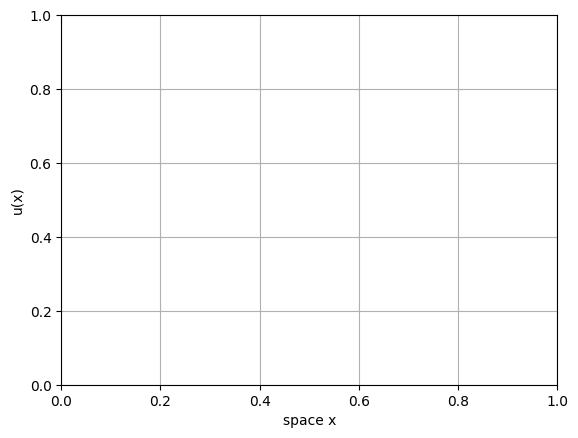

In [14]:
# Create plot object
fig, ax = plt.subplots()
ax.set_xscale("linear")
ax.set_xlabel("space x")
ax.set_ylabel("u(x)")
ax.set_yscale("linear")
ax.grid()

In [15]:
# Get all the simulations in the selected folder
# Rescale x->\chi and u->u_k with the ANALYTICAL expressions for alpha, beta
# Plot in the same canvas WITH the NDSolve solution for the u_k ODE
tinitial = 10

# Plot region
xmin = -100
xmax = 100

for folder in sorted(os.listdir(dir_save), reverse=False):
    dir = dir_save + folder
    print(dir)

    f = open(dir + "/tdgl_result.dat", "r")
    N = 1000000000
    x = np.zeros(N)
    u = np.zeros(N)
    i = 0
    for row in f:
        if i != 0:
            a, b = row.split(" ")
            x[i-1] = float(a)
            u[i-1] = float(b)
        else:
            N, tmax, dx, dt, seed, A, Thalf, Cave = row.split(" ")
            N = int(N)
            tmax = float(tmax) - tinitial
            dx = float(dx)
            L = N*dx
            dt = float(dt)
            A = float(A)
            T = 2*float(Thalf)
            Cave = float(Cave)
        i = i + 1

    x = x[0:i-1]
    u = u[0:i-1]

    if tmax > 0:
        print("t = " + str(tmax))
        alpha_t = alpha(alpha0, tmax)
        beta_t = beta(beta0, tmax)
    else:
        alpha_t = alpha0
        beta_t = beta0

    #beta_t = u[int(0.75*N)]    # Plateau value

    chi = (x-x[int(N/2)]*np.ones(len(x)))*alpha_t
    u_k = u/beta_t
    

    f.close()
    
    # Label with the state's time
    state_time = tmax 
    state_time = round(state_time, 3)
    labell = "t = " + str(state_time) # Label with time (uncomment for custom label)
    # Get custom label of the curve
    f = open(dir + "/label.dat", "r")
    temp_label = f.readline().strip('\n')
    if temp_label != "": 
        labell = temp_label
    f.close()

    ax.plot(chi, u_k, label = labell)

../../.saves/NDSolve start C decaying driving a=-2 b=1 beta0 = 1/1710415813342
../../.saves/NDSolve start C decaying driving a=-2 b=1 beta0 = 1/1710415825950
t = 10.0
../../.saves/NDSolve start C decaying driving a=-2 b=1 beta0 = 1/1710415850303
t = 20.0
../../.saves/NDSolve start C decaying driving a=-2 b=1 beta0 = 1/1710415888280
t = 40.0


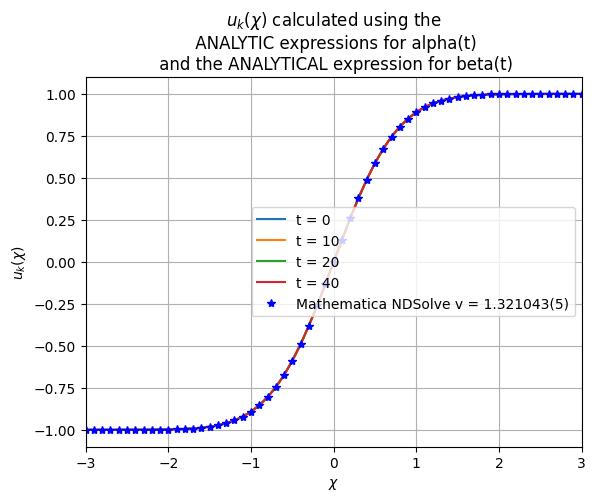

In [16]:
# Plot, in the same canvas, the NDSolve u_k(\chi)

# Read the numerical solution of the ODE
f = open("../../misc/NDSolve u_k ODE a=-2 vel=1.3210435.dat", "r")
N = 1000000000
chi = np.zeros(N)
u_k = np.zeros(N)
i = 0
for row in f:
    a, b = row.split("	")
    chi[i] = float(a)/np.sqrt(b_)   # Because \chi' = b^0.5 \chi
    u_k[i] = float(b)
    i = i + 1

chi = chi[0:i-1]
u_k = u_k[0:i-1]

ax.plot(chi, u_k, '*', label = "Mathematica NDSolve v = 1.321043(5)", color = "blue")



title = "$u_k(\chi)$ calculated using the\n ANALYTIC expressions for alpha(t)\n and the ANALYTICAL expression for beta(t)"
#title = "$u_k(\chi)$ calculated using the\n PLATEAU value for, beta(t)\n and ANALYTICAL for alpha(t)"
ax.set_title(title)
ax.set_xlabel("$\chi$")
ax.set_ylabel("$u_k(\chi)$")
ax.set_xlim(-3,3)
ax.set_ylim(-1.1, 1.1)


ax.legend()
fig

In [17]:
alpha(alpha0, tmax)

0.07881104062391006

In [18]:
u_k

array([-1.00002079, -1.00002078, -1.00002078, ...,  1.00002078,
        1.00002078,  1.00002078])